In [7]:
import pandas as pd
import polars as pl
import seaborn as sns
import statsmodels.api as sm

In [8]:
df = pl.read_csv("../data/raw_data/train.csv")
mini_df = df[:, :17]
mini_df.describe()

statistic,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12
str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1280.0,"""1280""","""1279""","""1280""","""1253""","""1280""",1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,834.0,1280.0,1280.0
"""null_count""",0.0,"""0""","""1""","""0""","""27""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,446.0,0.0,0.0
"""mean""",640.5,null,null,null,null,null,0.592414,0.114844,0.047656,0.163281,0.671094,0.421875,0.178906,0.010156,57.388489,0.955469,0.265625
"""std""",369.648482,null,null,null,null,null,0.108669,null,null,null,null,null,null,null,31.695205,null,null
"""min""",1.0,"""Job_Title_1""","""2018/11""","""High""","""AK""","""A""",0.3773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
"""25%""",321.0,null,null,null,null,null,0.4705,null,null,null,null,null,null,null,36.0,null,null
"""50%""",641.0,null,null,null,null,null,0.5995,null,null,null,null,null,null,null,60.0,null,null
"""75%""",960.0,null,null,null,null,null,0.6853,null,null,null,null,null,null,null,60.0,null,null
"""max""",1280.0,"""Others""","""2024/08""","""Medium""","""WA""","""E""",0.9063,1.0,1.0,1.0,1.0,1.0,1.0,1.0,300.0,1.0,1.0


In [9]:
df.describe()

statistic,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,…,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1280.0,"""1280""","""1279""","""1280""","""1253""","""1280""",1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,834.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,…,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0
"""null_count""",0.0,"""0""","""1""","""0""","""27""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,446.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",640.5,null,null,null,null,null,0.592414,0.114844,0.047656,0.163281,0.671094,0.421875,0.178906,0.010156,57.388489,0.955469,0.265625,0.195011,1.775129,-0.471561,-0.106538,-0.056146,-0.283087,-0.489879,-0.394381,-0.433959,0.250222,-0.272348,-0.555366,0.348308,-0.247826,0.09907,-0.040115,0.13444,-0.256554,0.358016,…,-0.570992,-0.137683,0.320998,-0.086025,0.074018,-0.30658,-0.058764,-0.303084,-0.065431,0.2998,-0.415419,0.43671,-0.139069,-0.202394,0.200998,-0.070996,0.278148,-0.536593,-0.026847,0.318656,0.262736,-0.647137,-0.097833,-0.106543,0.064172,-0.449721,-0.153953,-0.229636,-0.504288,-0.3373,-0.205454,0.062491,-0.289679,-0.125236,-0.609413,-0.697959,-0.065607
"""std""",369.648482,null,null,null,null,null,0.108669,null,null,null,null,null,null,null,31.695205,null,null,0.223345,0.786083,0.291197,0.291319,0.145954,0.196887,0.263636,0.220609,0.274802,0.231031,0.271441,0.270503,0.232863,0.200787,0.188265,0.195154,0.167635,0.172791,0.225742,…,0.2974,0.191215,0.210667,0.172003,0.210857,0.210883,0.171822,0.214706,0.185063,0.192699,0.283185,0.274471,0.156434,0.184302,0.179085,0.181233,0.216938,0.304471,0.171523,0.205947,0.220991,0.308327,0.22878,0.175808,0.173883,0.224591,0.261917,0.230086,0.297868,0.243932,0.243926,0.142622,0.194618,0.160217,0.280257,0.333347,0.149354
"""min""",1.0,"""Job_Title_1""","""2018/11""","""High""","""AK""","""A""",0.3773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,-0.763939,0.0,-2.138069,-1.69923,-0.720396,-0.814064,-1.426136,-1.298331,-1.400854,-0.822073,-1.43582,-1.205775,-0.917102,-0.829142,-0.724771,-1.060741,-0.445423,-0.915456,-0.378092,…,-1.423798,-0.84544,-0.549458,-0.866594,-0.716621,-1.096527,-1.035132,-1.029515,-1.201307,-1.063267,-1.46855,-0.692713,-0.857935,-0.886774,-0.730142,-0.755855,-0.319292,-1.428641,-1.130273,-0.465426,-0.874737,-1.474634,-0.935107,-1.170864,-0.815827,-1.091242,-1.805645,-1.139693,-1.553501,-1.308425,-1.05683,-

In [10]:
(df["job_desc_001"] == 0.0).sum()

166

<Axes: ylabel='Count'>

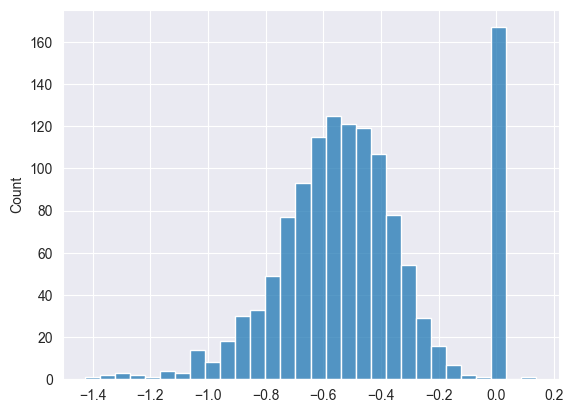

In [11]:
sns.histplot(df["job_desc_007"])

In [12]:
mini_df.head(20)

obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12
i64,str,str,str,str,str,f64,bool,bool,bool,bool,bool,bool,bool,f64,bool,bool
1,"""Others""","""2024/07""","""High""","""NY""","""A""",0.6429,false,false,true,true,true,false,false,60.0,true,false
2,"""Job_Title_1""","""2024/07""","""Low""","""CA""","""A""",0.4678,false,false,false,true,true,true,false,60.0,true,true
3,"""Others""","""2024/07""","""Low""","""CA""","""A""",0.461,false,false,false,true,true,true,false,36.0,true,true
4,"""Others""","""2024/07""","""Low""","""CA""","""A""",0.5064,false,false,false,true,true,true,false,72.0,true,true
5,"""Others""","""2024/07""","""Low""","""CA""","""A""",0.464,false,false,false,true,true,false,false,48.0,true,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
16,"""Others""","""2024/07""","""High""","""NY""","""A""",0.6081,false,false,false,true,false,false,false,96.0,true,false
17,"""Others""","""2023/02""","""Medium""","""NY""","""A""",0.6834,false,false,false,false,false,false,false,12.0,true,false
18,"""Others""","""2024/07""","""Low""","""NY""","""A""",0.47,false,false,false,false,false,false,false,60.0,true,true


In [13]:
mini_df_adj = mini_df.with_columns(
    pl.col("job_posted_date").str.strptime(pl.Date, format="%Y/%m"),
    pl.col("job_title").cast(pl.Categorical),
    pl.col("salary_category").cast(pl.Categorical),
    pl.col("job_state").cast(pl.Categorical),
    pl.col("feature_1").cast(pl.Categorical),
    pl.col(pl.Boolean).cast(pl.Int32)
)

In [20]:
df.head(10)

obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,job_desc_020,…,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
i64,str,str,str,str,str,f64,bool,bool,bool,bool,bool,bool,bool,f64,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,"""Others""","""2024/07""","""High""","""NY""","""A""",0.6429,false,false,true,true,true,false,false,60.0,true,false,0.193511,2.275482,-0.440363,-0.327473,0.058464,-0.154043,-0.393158,-0.367905,-0.703665,0.562969,0.058359,-0.632267,0.326872,-0.276131,0.098252,0.019475,0.105348,-0.411405,0.635027,-0.192049,…,-0.684483,-0.174529,0.467105,-0.024953,-0.167435,-0.342473,0.185418,-0.233041,-0.016037,0.602155,-0.511326,0.60238,-0.25441,-0.114025,0.08606,-0.012974,0.523685,-0.864781,0.084526,0.15464,0.283154,-0.848735,-0.108635,0.049179,0.210502,-0.53584,0.113221,-0.362079,-0.499308,-0.367894,-0.214881,0.01487,-0.271177,-0.113347,-0.587955,-0.919095,-0.20734
2,"""Job_Title_1""","""2024/07""","""Low""","""CA""","""A""",0.4678,false,false,false,true,true,true,false,60.0,true,true,0.100152,2.291134,-0.356041,-0.494735,0.038632,-0.356995,-0.63302,-0.444805,-0.252597,0.18721,0.261958,-0.734535,0.264041,-0.209023,0.144627,-0.182167,0.144194,-0.43669,0.405126,-0.240945,…,-0.412693,-0.424291,0.518947,-0.151527,-0.065834,-0.395344,0.04834,-0.198469,0.0261,0.390649,-0.484126,0.53313,-0.196634,-0.330162,0.200502,0.047225,0.263908,-0.817924,-0.069964,0.357457,0.323456,-0.977607,-0.034979,-0.053379,-0.02734,-0.511633,-0.105435,-0.300989,-0.415411,-0.341824,-0.319064,0.042322,-0.124755,0.023489,-0.893224,-0.823024,0.112364
3,"""Others""","""2024/07""","""Low""","""CA""","""A""",0.461,false,false,false,true,true,true,false,36.0,true,true,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"""Others""","""2024/07""","""Low""","""CA""","""A""",0.5064,false,false,false,true,true,true,false,72.0,true,true,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"""Others""","""2024/07""","""Low""","""CA""","""A""",0.464,false,false,false,true,true,false,false,48.0,true,true,0.406864,1.986625,-0.726046,-0.316294,0.062115,-0.451118,-0.659871,-0.451544,-0.505597,0.119204,-0.542267,-0.623306,0.048583,-0.103152,-0.007468,0.236105,0.20434,-0.280865,0.203199,-0.435184,…,-0.916092,-0.327722,0.273902,0.074941,0.175365,-0.272249,-0.008637,-0.153464,-0.001045,0.295818,-0.174998,0.781811,-0.155236,-0.612957,0.254792,-0.063058,0.259242,-0.669112,0.142055,0.200105,0.227985,-0.829408,-0.361299,0.005694,-0.118158,-0.654845,-0.099771,-0.406159,-0.654657,-0.074398,-0.464479,0.081037,-0.136992,-0.27627,-0.696853,-0.601466,0.089939
6,"""Others""","""2024/01""","""High""","""WA""","""A""",0.6681,false,false,false,false

In [15]:
mini_df_adj.describe()

statistic,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12
str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1280.0,"""1280""","""1279""","""1280""","""1253""","""1280""",1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,834.0,1280.0,1280.0
"""null_count""",0.0,"""0""","""1""","""0""","""27""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,446.0,0.0,0.0
"""mean""",640.5,null,"""2024-03-09 21:42:38.561000""",null,null,null,0.592414,0.114844,0.047656,0.163281,0.671094,0.421875,0.178906,0.010156,57.388489,0.955469,0.265625
"""std""",369.648482,null,null,null,null,null,0.108669,0.318958,0.213121,0.369767,0.469999,0.494052,0.383424,0.100304,31.695205,0.206353,0.441838
"""min""",1.0,null,"""2018-11-01""",null,null,null,0.3773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
"""25%""",321.0,null,"""2024-04-01""",null,null,null,0.4705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,1.0,0.0
"""50%""",641.0,null,"""2024-07-01""",null,null,null,0.5995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,1.0,0.0
"""75%""",960.0,null,"""2024-07-01""",null,null,null,0.6853,0.0,0.0,0.0,1.0,1.0,0.0,0.0,60.0,1.0,1.0
"""max""",1280.0,null,"""2024-08-01""",null,null,null,0.9063,1.0,1.0,1.0,1.0,1.0,1.0,1.0,300.0,1.0,1.0


In [16]:
# 1. Find all the categorical columns in self.data
cat_cols = [
    name
    for name, dtype in mini_df_adj.schema.items()
    if dtype == pl.Categorical
]

# 2. For each cat-col, get value_counts and tag it with the column name
counts = []
for c in cat_cols:
            # 2a. Select just that column, then call DataFrame.value_counts()
            vc = (
                mini_df_adj[c]
                  .value_counts()            # yields columns: c, "count"
                  .rename({c: "value"})     # rename the category column to "value"
                  .with_columns(pl.lit(c).alias("column"))
            )
            counts.append(vc)

# 3. Concatenate all of them
out = pl.concat(counts, how="vertical")

out

sys:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance


value,count,column
cat,u32,str
"""Others""",889,"""job_title"""
"""Job_Title_1""",27,"""job_title"""
"""Job_Title_2""",32,"""job_title"""
"""Job_Title_3""",46,"""job_title"""
"""Job_Title_4""",5,"""job_title"""
…,…,…
"""A""",1232,"""feature_1"""
"""B""",36,"""feature_1"""
"""C""",6,"""feature_1"""


<Axes: ylabel='Count'>

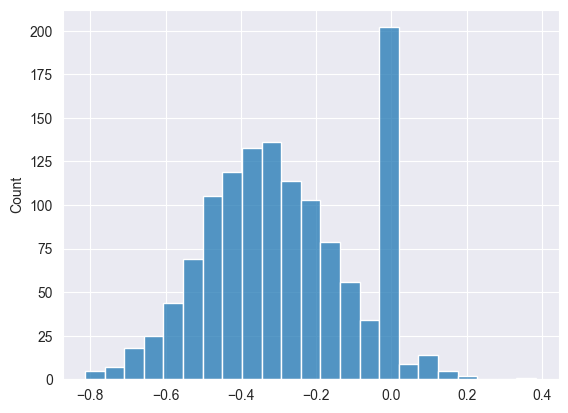

In [17]:
sns.histplot(df["job_desc_006"])

In [18]:
from Classes.DataHandler import DataHandler

dh = DataHandler(fill_data=True, train_data=True)
X_train, Y_train = dh.X.to_pandas(), pd.DataFrame({"category": dh.Y})

TypeError: DataHandler.__init__() got an unexpected keyword argument 'fill_data'

In [48]:
X_train

,feature_1_A,feature_1_B,feature_1_C,feature_1_D,feature_1_E,feature_2,feature_3,feature_4,feature_5,feature_6,...,job_title_Job_Title_4,job_title_Job_Title_5,job_title_Job_Title_6,job_title_Job_Title_7,job_title_Job_Title_8,job_title_Job_Title_9,job_title_Others,months_since_ref,month,jd_norm
0,1.0,0.0,0.0,0.0,0.0,0.6429,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0,7.0,9.237861
1,1.0,0.0,0.0,0.0,0.0,0.4678,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,7.0,9.025490
2,1.0,0.0,0.0,0.0,0.0,0.4610,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0,7.0,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.5064,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0,7.0,0.000000
4,1.0,0.0,0.0,0.0,0.0,0.4640,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0,7.0,9.062180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1.0,0.0,0.0,0.0,0.0,0.5391,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,6.0,8.851770
1276,1.0,0.0,0.0,0.0,0.0,0.7151,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0,7.0,9.095124
1277,1.0,0.0,0.0,0.0,0.0,0.5791,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,8.0,8.460282
1278,1.0,0.0,0.0,0.0,0.0,0.7082,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,7.0,9.498258


In [62]:

from sklearn.preprocessing import StandardScaler

# Scale the selected columns
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_train.iloc[:, 5:16])

# Get the original column names for the selected slice
selected_cols = X_train.columns[5:16]

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled_array, columns=selected_cols, index=X_train.index)

model = sm.MNLogit(Y_train, X_scaled).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.892095
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               category   No. Observations:                 1280
Model:                        MNLogit   Df Residuals:                     1258
Method:                           MLE   Df Model:                           20
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.1812
Time:                        13:31:57   Log-Likelihood:                -1141.9
converged:                       True   LL-Null:                       -1394.5
Covariance Type:            nonrobust   LLR p-value:                 2.278e-94
==============================================================================
category=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feature_2     -1.0556      0.085    -12.473      0.000      -1.221      -0.890
feature_3     -0.4606      0.088     -5.218      0.000      -0.634      -0.288
feature_4     -0.2225      0.094     -2.362      0.018      -0.407      -0.038
feature_5     -0.3314      0.086     -3.852      0.000      -0.500      -0.163
feature_6     -0.2548      0.094     -2.706      0.007      -0.439      -0.070
feature_7      0.1058      0.094      1.129      0.259      -0.078       0.290
feature_8      0.8356      0.098      8.492      0.000       0.643       1.028
feature_9      0.1460      0.141      1.035      0.301      -0.131       0.423
feature_10    -0.2457      0.082     -3.014      0.003      -0.406      -0.086
feature_11    -0.4765      0.099     -4.801      0.000      -0.671      -0.282
feature_12     0.2055      0.081      2.529      0.011       0.046       0.365
------------------------------------------------------------------------------
category=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feature_2     -0.2733      0.080     -3.436      0.001      -0.429      -0.117
feature_3     -0.0820      0.068     -1.209      0.227      -0.215       0.051
feature_4      0.1841      0.066      2.795      0.005       0.055       0.313
feature_5      0.1097      0.067      1.633      0.102      -0.022       0.241
feature_6     -0.1909      0.089     -2.136      0.033      -0.366      -0.016
feature_7      0.1905      0.086      2.215      0.027       0.022       0.359
feature_8      0.5894      0.099      5.939      0.000       0.395       0.784
feature_9      0.2426      0.136      1.788      0.074      -0.023       0.508
feature_10    -0.4721      0.087     -5.452      0.000      -0.642      -0.302
feature_11    -0.3242      0.101     -3.224      0.001      -0.521      -0.127
feature_12     0.1149      0.078      1.474      0.140      -0.038       0.268
==============================================================================
"""

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# Split the data into train and test sets (80% train, 20% test)
X_train_split, X_test_split, Y_train_split, Y_test_split = train_test_split(
    X_train.iloc[:, 5:250], Y_train, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_test_scaled = scaler.transform(X_test_split)

# Convert the scaled data back into DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_split.columns, index=X_train_split.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_split.columns, index=X_test_split.index)

# Fit the model on the training data
model = sm.MNLogit(Y_train_split, X_train_scaled).fit()

# Print the model summary
print(model.summary())

# Predict the probabilities on the test set
predicted_probs = model.predict(X_test_scaled)

# Get the predicted class (the one with the highest probability)
predicted_classes = predicted_probs.idxmax(axis=1)

# Calculate the accuracy on the test set
accuracy = accuracy_score(Y_test_split, predicted_classes)
print(f"Test Accuracy: {accuracy:.4f}")


Optimization terminated successfully.
         Current function value: 0.401872
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:               category   No. Observations:                 1024
Model:                        MNLogit   Df Residuals:                      534
Method:                           MLE   Df Model:                          488
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.6305
Time:                        13:34:00   Log-Likelihood:                -411.52
converged:                       True   LL-Null:                       -1113.7
Covariance Type:            nonrobust   LLR p-value:                 1.473e-89
  category=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
feature_2       -2.3251      0.252     -9.224      0.000      -2.819      -1.831
feature_3       -0.709

In [4]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [95]:
dh = DataHandler()
X, Y = dh.get_train_data()

month_encoded_columns = sorted([c for c in X.columns if c.startswith("month_")])
feature_1_encoded_columns = sorted([c for c in X.columns if c.startswith("feature_1_")])
job_title_encoded_columns = sorted([c for c in X.columns if c.startswith("job_title_")])
job_state_encoded_columns = sorted([c for c in X.columns if c.startswith("job_state_")])
bool_columns = [f"feature_{i}" for i in range(3, 10)] + ["feature_11", "feature_12"]
quantitative_columns = ["feature_2", "feature_10"]
job_desc_cols = [f"job_desc_{i:03d}" for i in range(1, 301)]

total_features = job_desc_cols + bool_columns + quantitative_columns 
total_features = bool_columns + quantitative_columns + job_desc_cols + month_encoded_columns + feature_1_encoded_columns + job_title_encoded_columns
X = X[total_features].to_pandas()
Y = Y.to_pandas()

In [80]:
model = OrderedModel(Y, X, distr='probit')  # or 'probit', etc.
result = model.fit(method='bfgs')
result.summary()

Optimization terminated successfully.
         Current function value: 1.048341
         Iterations: 46
         Function evaluations: 47
         Gradient evaluations: 47


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:        salary_category   Log-Likelihood:                -1341.9
Model:                   OrderedModel   AIC:                             2710.
Method:            Maximum Likelihood   BIC:                             2777.
Date:                Wed, 07 May 2025                                         
Time:                        20:27:12                                         
No. Observations:                1280                                         
Df Residuals:                    1267                                         
Df Model:                          11                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feature_3     -0.1472      0.104     -1.410      0.159      -0.352       0.057
feature_4      0.5697      0.157      3.630      0.000       0.262       0.877
feature_5      0.1813      0.090      2.009      0.044       0.004       0.358
feature_6     -0.1603      0.082     -1.956      0.051      -0.321       0.000
feature_7      0.1383      0.077      1.801      0.072      -0.012       0.289
feature_8      0.3617      0.084      4.329      0.000       0.198       0.526
feature_9      0.8395      0.345      2.432      0.015       0.163       1.516
feature_11    -0.4246      0.155     -2.746      0.006      -0.728      -0.122
feature_12     0.0905      0.074      1.230      0.219      -0.054       0.235
feature_2     -0.1070      0.033     -3.246      0.001      -0.172      -0.042
feature_10    -0.1854      0.033     -5.614      0.000      -0.250      -0.121
0/1           -0.5966      0.147     -4.048      0.000      -0.885      -0.308
1/2           -0.1059      0.042     -2.492      0.013      -0.189      -0.023
==============================================================================
"""

In [81]:
num_of_thresholds = 2
model.transform_threshold_params(result.params[-num_of_thresholds:])

array([       -inf, -0.59661428,  0.30293789,         inf])

In [82]:
probs = result.model.predict(result.params, exog=X)
probs

array([[0.39644772, 0.34148972, 0.26206256],
       [0.24009804, 0.33664368, 0.42325828],
       [0.18760764, 0.31750086, 0.4948915 ],
       ...,
       [0.49011201, 0.31903686, 0.19085113],
       [0.54077371, 0.30103887, 0.15818742],
       [0.31590947, 0.34698802, 0.3371025 ]], shape=(1280, 3))

In [86]:
import numpy as np
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Fit the model (logit link here; use 'probit' if you prefer)
mod = OrderedModel(Y, X, distr="logit")
res = mod.fit(method="bfgs", disp=False)

# 2) Predict probabilities on the training data
#    Make sure to pass X.values if X is a DataFrame
exog = X.values if hasattr(X, "values") else X
probs = res.model.predict(res.params, exog=exog)   # shape (n_obs, n_cats)

# 3) Convert to class predictions via argmax
pred = np.argmax(probs, axis=1)                    # integers in {0,1,2}

# 4) True labels as a flat numpy array
true = Y.values.ravel() if hasattr(Y, "values") else np.asarray(Y).ravel()

# 5) Compute model accuracy
model_acc = accuracy_score(true, pred)

# 6) Compute a simple baseline: always guess the most frequent class
most_freq = np.bincount(true).argmax()
baseline_acc = accuracy_score(true, np.full_like(true, most_freq))

print(f"Model accuracy:    {model_acc:.3f}")
print(f"Baseline accuracy: {baseline_acc:.3f}\n")

# 7) Detailed diagnostics
print("Classification report:\n", classification_report(true, pred, digits=3))
print("Confusion matrix:\n", confusion_matrix(true, pred))


Model accuracy:    0.445
Baseline accuracy: 0.391

Classification report:
               precision    recall  f1-score   support

           0      0.505     0.850     0.634       501
           1      0.413     0.186     0.257       419
           2      0.262     0.181     0.214       360

    accuracy                          0.445      1280
   macro avg      0.393     0.406     0.368      1280
weighted avg      0.407     0.445     0.392      1280

Confusion matrix:
 [[426  38  37]
 [195  78 146]
 [222  73  65]]


In [87]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Prepare arrays
X_arr = X.values if hasattr(X, "values") else np.asarray(X)
Y_arr = Y.values.ravel()  # integer labels 0,1,2

# Stratified K-Fold to preserve class proportions
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

acc_scores = []
reports = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_arr, Y_arr), 1):
    X_tr, X_te = X_arr[train_idx], X_arr[test_idx]
    Y_tr, Y_te = Y_arr[train_idx], Y_arr[test_idx]

    # 1) Fit on training split
    mod = OrderedModel(Y_tr, X_tr, distr="logit")
    res = mod.fit(method="bfgs", disp=False)

    # 2) Predict probabilities on test split
    probs_te = res.model.predict(res.params, exog=X_te)

    # 3) Argmax → class predictions
    pred_te = np.argmax(probs_te, axis=1)

    # 4) Accuracy & report
    acc = accuracy_score(Y_te, pred_te)
    acc_scores.append(acc)

    rep = classification_report(
        Y_te, pred_te, digits=3, output_dict=True
    )
    reports.append(rep)

    print(f"Fold {fold}: accuracy = {acc:.3f}")

# Summary metrics
mean_acc = np.mean(acc_scores)
std_acc  = np.std(acc_scores)
print(f"\n5-fold CV accuracy: {mean_acc:.3f} ± {std_acc:.3f}")

# Aggregate per-class F1 (macro-averaged)
macro_f1s = [r["macro avg"]["f1-score"] for r in reports]
print(f"5-fold CV macro-F1:  {np.mean(macro_f1s):.3f} ± {np.std(macro_f1s):.3f}")


Fold 1: accuracy = 0.438
Fold 2: accuracy = 0.441
Fold 3: accuracy = 0.430
Fold 4: accuracy = 0.461
Fold 5: accuracy = 0.445

5-fold CV accuracy: 0.443 ± 0.010
5-fold CV macro-F1:  0.365 ± 0.012


In [99]:
import mord

# ensure X is a 2D numpy array
X_arr = X.values if hasattr(X, "values") else np.asarray(X)

# ensure Y is a 1D numpy array of ints
Y_arr = Y.values.ravel() if hasattr(Y, "values") else np.asarray(Y).ravel()

clf = mord.LogisticIT(alpha=10)
clf.fit(X_arr, Y_arr)

print("coefs:",   clf.coef_)
print("thresholds:", clf.theta_)


# predictions
pred = clf.predict(X.values)

from sklearn.metrics import accuracy_score
print("Training accuracy:", accuracy_score(Y, pred))


coefs: [-1.68705190e-01  3.53965082e-01  3.22995932e-01 -2.57590328e-01
  1.01846527e-01  3.29655997e-01  9.46074315e-02 -1.61103805e-01
  9.64448819e-04 -1.51452109e-01 -2.39224941e-01 -1.85749938e-01
  1.40454680e-01 -1.33126180e-01  1.72598977e-01 -3.12276178e-01
  1.27881397e-01 -9.91345303e-02  7.72525007e-02  1.70499018e-01
  1.37645175e-01  9.34849847e-02 -6.97520303e-02 -7.80599652e-03
  1.47611605e-01  2.78558708e-02 -3.85265378e-02  2.53700262e-01
 -2.79207102e-02  6.48040241e-03  4.53400606e-02 -2.42843971e-01
 -2.54126432e-02 -9.94684781e-02 -1.53162737e-01 -2.06855603e-01
  1.51049425e-01 -1.62022830e-01 -9.26492917e-02  1.89321640e-01
  1.85546495e-01 -1.65320934e-02 -1.66769062e-02 -1.17346772e-01
 -3.85078060e-02  1.18524308e-02 -6.87483185e-02  9.83202260e-02
 -2.60155009e-01 -1.16643326e-02  8.20337489e-02 -1.22243721e-01
  3.47729279e-02 -7.47753017e-02 -3.16499288e-02  1.18676535e-01
 -4.37075521e-02  1.53005943e-01 -8.71636047e-02  7.83055476e-03
  1.44243652e-01  